<a href="https://colab.research.google.com/github/pavan-kalam/PDS-Project/blob/main/Deep_Fake_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google drive to Colab to store store the model and results in drive.**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install opendatasets

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import io
import os
import matplotlib.pyplot as plt
import opendatasets as od
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, HTML
from tensorflow.keras.models import Sequential

Creating project directories in drive to save the model and results

In [ ]:
# Create directory for models if it doesn't exist
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/model', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/visualization', exist_ok=True)

### **Download the dataset from Kaggle**



In [ ]:
def download_dataset():
    if not os.path.exists('/content/drive/MyDrive/deepfake-and-real-images'):
        print("Downloading dataset...")
        od.download("https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images")
        print("Dataset downloaded successfully!")
    else:
        print("Dataset already exists!")

Note: To download the dataset use the below kaggle details,

Kaggle username: **pavankalam**

Kaggle key: **23347953**

In [ ]:
# Download the dataset
print("Checking for dataset...")
download_dataset()

Checking for dataset...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavankalam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images


100%|██████████| 1.68G/1.68G [00:23<00:00, 76.9MB/s]



Dataset downloaded successfully!


## **Data Preprocessing**

In [ ]:
def load_dataset(path):
    return tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode='binary',
        color_mode="rgb",
        batch_size=32,
        image_size=(128, 128),
        shuffle=True,
        seed=123,
    )

In [ ]:
# Load and preprocess the dataset
dataset_path = 'deepfake-and-real-images/Dataset'
test_data = load_dataset(os.path.join(dataset_path, 'Test'))
train_data = load_dataset(os.path.join(dataset_path, 'Train'))
val_data = load_dataset(os.path.join(dataset_path, 'Validation'))

Found 10905 files belonging to 2 classes.
Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


## **Model Creation and Training**

In [ ]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", padding='same', input_shape=(128, 128, 3)),
        layers.Conv2D(32, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Conv2D(64, (3,3), activation="relu", padding='same'),
        layers.Conv2D(64, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Conv2D(128, (3,3), activation="relu", padding='same'),
        layers.Conv2D(128, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model

In [ ]:
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def train_model(model, train_data, val_data, epochs=20):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=val_data,
        callbacks=[early_stopping_cb]
    )

    return history

In [ ]:
# Train the model
print("Training new model...")
history = train_model(model, train_data, val_data)

Training new model...
Epoch 1/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 217s 47ms/step - accuracy: 0.7697 - loss: 0.6434 - val_accuracy: 0.8615 - val_loss: 0.3465
Epoch 2/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 248s 46ms/step - accuracy: 0.9169 - loss: 0.2050 - val_accuracy: 0.9132 - val_loss: 0.2054
Epoch 3/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 215s 49ms/step - accuracy: 0.9401 - loss: 0.1517 - val_accuracy: 0.9306 - val_loss: 0.1738
Epoch 4/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 214s 49ms/step - accuracy: 0.9513 - loss: 0.1257 - val_accuracy: 0.9312 - val_loss: 0.1786
Epoch 5/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 247s 45ms/step - accuracy: 0.9544 - loss: 0.1165 - val_accuracy: 0.9353 - val_loss: 0.1652
Epoch 6/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 217s 49ms/step - accuracy: 0.9616 - loss: 0.1028 - val_accuracy: 0.9422 - val_loss: 0.1709
Epoch 7/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 197s 45ms/step - accuracy: 0.9641 - loss: 0.0946 - val_accuracy: 0.9434 - val_loss: 0.1598
Epoch 8/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 196s 

### **Saving trained model to google drive for further use in flask application**

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/model/cnn_original.keras')
print("Model trained and saved.")

Model trained and saved.


**Model evaluation with validation data**

In [ ]:
# Evaluate the model with Validation data
def model_evaluation(model, val_data):
    loss, accuracy = model.evaluate(val_data)


# Evaluate the model on validation data
model_evaluation(model, val_data)

1233/1233 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9518 - loss: 0.1407


**Model evaluation with test data**

In [ ]:
# Evaluate the model with Test data
def model_evaluation(model, test_data):
    loss, accuracy = model.evaluate(test_data)

model_evaluation(model, test_data)

341/341 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9233 - loss: 0.2010


### Visualizing the model accuracy and loss during training at every epoch

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/visualization/model-accuracy-loss.png')
    plt.show()

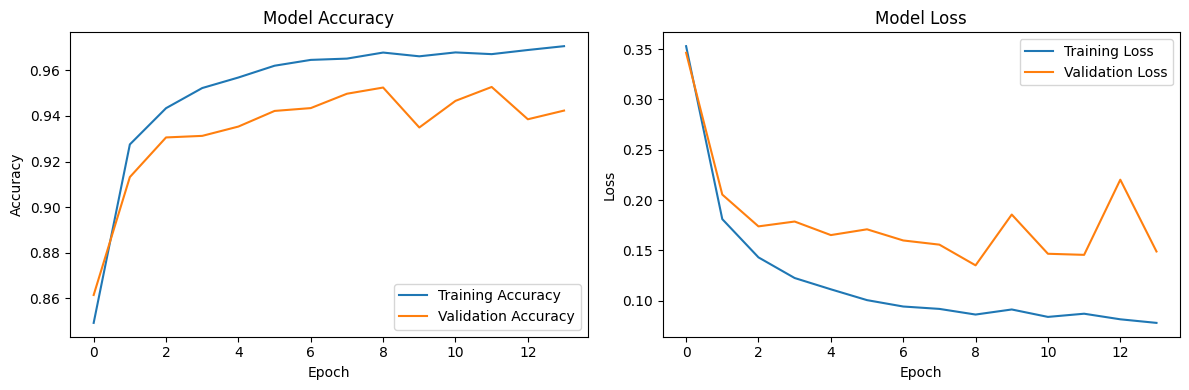

In [ ]:
# Plot and save training history
plot_history(history)

**Visualizing the confusion matrix**

Found 10905 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━

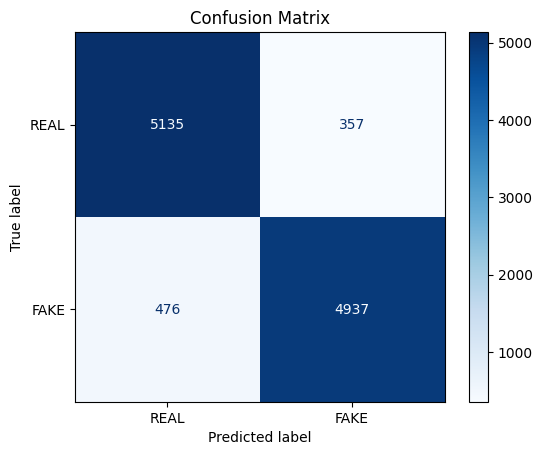

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, test_data):
    # Get true labels and predictions
    true_labels = []
    predictions = []

    for images, labels in test_data:
        preds = model.predict(images)
        preds = (preds >= 0.5).astype(int)  # Convert probabilities to binary predictions
        true_labels.extend(labels.numpy())
        predictions.extend(preds.flatten())

    return true_labels, predictions

# Load test dataset
test_data = load_dataset(os.path.join(dataset_path, 'Test'))

# Evaluate the model
true_labels, predictions = evaluate_model(model, test_data)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["REAL", "FAKE"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/visualization/confusionmatrix.png')
plt.show()